In [1]:
%load_ext autoreload
%autoreload 2

In [22]:
import glob
from shutil import copyfile
import os

for f in glob.glob('./cache/translations/*/*/translations.csv'):
    target_path = f.replace('cache', 'data').rstrip('translations.csv')
    os.makedirs(os.path.dirname(target_path), exist_ok=True)
    copyfile(f, target_path)

# for translator in ...:
#     for language in ...:
#         copy(translations.csv, data/translation/translator/langauge)

IsADirectoryError: [Errno 21] Is a directory: './data/translations/amazon_translate/cs/'

In [2]:
import statistics
import math
import matplotlib.pyplot as plt
from unidecode import unidecode
from collections import Counter
import numpy as np


def binary_ci(success, total, alpha=0.95):
    """
    Using Agresti-Coull interval
    
    Return mean and confidence interval (lower and upper bound)
    """
    z = statistics.NormalDist().inv_cdf((1 + alpha) / 2)
    total = total + z**2
    loc = (success + (z**2) / 2) / total
    diameter = z * math.sqrt(loc * (1 - loc) / total)
    return loc, loc - diameter, loc + diameter 


def set_size(w,h, ax=None):
    """
    Used to size the figures with subplots
    
    https://stackoverflow.com/questions/44970010/axes-class-set-explicitly-size-width-height-of-axes-in-given-units
    """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)


In [6]:
sentences = []
stereotypes = []

for line in open('./data/samples.txt'):
    words = line.split()
    sentences.append(' '.join(words[:-1]))
    stereotypes.append(int(words[-1]))

stereo_names = """
Emotional
Gentle
Empathetic
Neat
Social
Weak
Beautiful
Tough and rough
Self-confident
Professional
Rational
Providers
Leaders
Childish
Sexual
Strong
""".strip().split('\n')

In [7]:
"""
Retrieving unsaved translations from logs
"""

# import os
# google_translate = GoogleTranslate(
#     data_path='./cache/translations/google_translate',
#     target_language=target_language,
#     enable_api=False
# ).load()

# for i in range(1, 201):
#     fdir = '/labs/cache/translations/google_translate/cs/logs'
#     fin, fout = os.path.join(fdir, f'{i}.from'), os.path.join(fdir, f'{i}.to')
#     from_, to_ = open(fin).read(), open(fout).read()
#     if from_ not in google_translate.dataframe.index:
#         google_translate.dataframe.loc[from_] = to_

# google_translate.save()

'\nRetrieving unsaved translations from logs\n'

In [8]:
from unidecode import unidecode
from parser import Parser
from translators.google_translate import GoogleTranslate
from translators.amazon_translate import AmazonTranslate
from translators.deepl import DeepL

deepl_languages = ['cs', 'pl', 'ru', 'sl', 'sk', 'uk']
amazon_language = ['cs', 'pl', 'ru', 'sl', 'sk', 'uk', 'sr', 'hr']
google_language = ['cs', 'pl', 'ru', 'sl', 'sk', 'uk', 'sr', 'hr', 'be']

import logging
logging.basicConfig()
logging.getLogger('deepl').setLevel(logging.WARNING)

for target_language in ['cs', 'pl', 'ru', 'sl', 'sk', 'uk']:
    translator = DeepL(
        data_path='./cache/translations/deepl',
        target_language=target_language,
        enable_api=True,
        server_url='https://api.deepl.com/',
    ).load()
    parser = Parser(language=target_language).load_model()
    for x in range(len(sentences)//100 + 1):   
    # for x in range(15):   
        translations = translator.translate(sentences[x*100: x*100 + 100], save=True)
        parser.parse(list(translations.values()))
# google_translate = GoogleTranslate(
#     data_path='./cache/translations/google_translate',
#     target_language=target_language,
#     enable_api=False
# ).load()


INFO:translators.translator:Loaded translations: 3670
INFO:trankit.adapter_transformers.tokenization_utils:loading file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-sentencepiece.bpe.model from cache at cache/trankit/xlm-roberta-base/0c370616ddfc06067c0634160f749c2cf9d8da2c50e03a2617ce5841c8df3b1d.309f0c29486cffc28e1e40a2ab0ac8f500c203fe080b95f820aa9cb58e5b84ed


Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for czech
Loading tagger for czech
Loading multi-word expander for czech
Loading lemmatizer for czech
Active language: czech


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.58it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3671
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.13it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3672
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.12it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3673
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.50it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3674
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 452046

Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for polish
Loading tagger for polish
Loading multi-word expander for polish
Loading lemmatizer for polish
Active language: polish


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.11it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3671
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.62it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3672
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.12it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3673
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.56it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3674
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 309095

Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for russian
Loading tagger for russian
Loading lemmatizer for russian
Loading NER tagger for russian
Active language: russian


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.13it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3671
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.57it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3672
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.16it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3673
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.58it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3674
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 417317

Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for slovenian
Loading tagger for slovenian
Loading lemmatizer for slovenian
Active language: slovenian


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.61it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3671
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.25it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3672
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.46it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3673
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.82it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3674
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 466690

Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for slovak
Loading tagger for slovak
Loading lemmatizer for slovak
Active language: slovak


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  2.52it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 11750
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  6.67it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 11751
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.30it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 11752
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.73it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 11753
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 38

Loading pretrained XLM-Roberta, this may take a while...


INFO:trankit.adapter_transformers.configuration_utils:loading configuration file https://s3.amazonaws.com/models.huggingface.co/bert/xlm-roberta-base-config.json from cache at cache/trankit/xlm-roberta-base/762ddd751172e9d3229e5da17a459eee6c0dfdc237c718944d0b1a85f06c7e1e.2b0f807393c56e8861a31cd67d2fc0b45d71d9735dd47dd66afb650f90b6d2a8
INFO:trankit.adapter_transformers.configuration_utils:Model config XLMRobertaConfig {
  "adapters": {
    "adapters": {},
    "config_map": {}
  },
  "architectures": [
    "XLMRobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "xlm-roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "output_hidden_states": true,
  "output_past": true,
  "pad_token_id": 1,
  "type_vocab_size": 1

Loading tokenizer for ukrainian
Loading tagger for ukrainian
Loading multi-word expander for ukrainian
Loading lemmatizer for ukrainian
Active language: ukrainian


100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  3.11it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3671
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.47it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3672
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  4.38it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3673
100%|█████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00,  5.02it/s]
INFO:translators.translator:New translations: 1
INFO:translators.translator:Saved translations: 3674
100%|███████████████████████████████████████████████████████████████████████████████| 79/79 [00:00<00:00, 321699

In [9]:
from parser import Parser

from gender_heuristics.heuristics import run_heuristics_wrapper
from gender_heuristics.l_be import be_heuristics
from gender_heuristics.l_bg import bg_heuristics
from gender_heuristics.l_cs import cs_heuristics
from gender_heuristics.l_hr import hr_heuristics
from gender_heuristics.l_pl import pl_heuristics
from gender_heuristics.l_sk import sk_heuristics
from gender_heuristics.l_sl import sl_heuristics
from gender_heuristics.l_sr import sr_heuristics
from gender_heuristics.l_sr_latn import sr_latn_heuristics
from gender_heuristics.l_ru import ru_heuristics
from gender_heuristics.l_uk import uk_heuristics

heuristics_map = {
    'bg': bg_heuristics,
    'be': be_heuristics,
    'cs': cs_heuristics,
    'hr': hr_heuristics,
    'pl': pl_heuristics,
    'sk': sk_heuristics,
    'sl': sl_heuristics,
    'sr': sr_heuristics,
    'ru': ru_heuristics,
    'uk': uk_heuristics,
}

def predictions(language, lazy, heuristics=None):

    translator = DeepL(
        data_path='./cache/translations/deepl',
        target_language=language,
        enable_api=False
    ).load()
    parser = Parser(language=language)

    if heuristics is None:
        heuristics = heuristics_map[language]

    h = run_heuristics_wrapper(heuristics, lazy)
    buf = []
    for sentence, stereotype in zip(sentences, stereotypes):
        try:
            translation = translator.dataframe.loc[sentence]['to']
        except KeyError:
            continue
        tokens = parser.dict[translation]['sentences'][0]['tokens']
        buf.append(h(translation, tokens))

    return buf
 


In [10]:
preds = {
    lang: predictions(lang, lazy=False)
    for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']
}

lazy_preds = {
    lang: predictions(lang, lazy=True)
    for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']
}

# Used for Amazon Translate
# preds['sr'] = predictions('sr', lazy=False, heuristics=sr_latn_heuristics)
# lazy_preds['sr'] = predictions('sr', lazy=True, heuristics=sr_latn_heuristics)

INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 11753
INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 3674
INFO:translators.translator:Loaded translations: 11753
INFO:translators.translator:Loaded translations: 0
INFO:translators.translator:Loaded translations: 3674


In [11]:
for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']:
    print(lang, sum(map(bool, lazy_preds[lang])))

be 0
hr 0
cs 3270
pl 3084
ru 2727
sl 3185
sk 3348
sr 0
uk 2775


# Machine translation results analysis

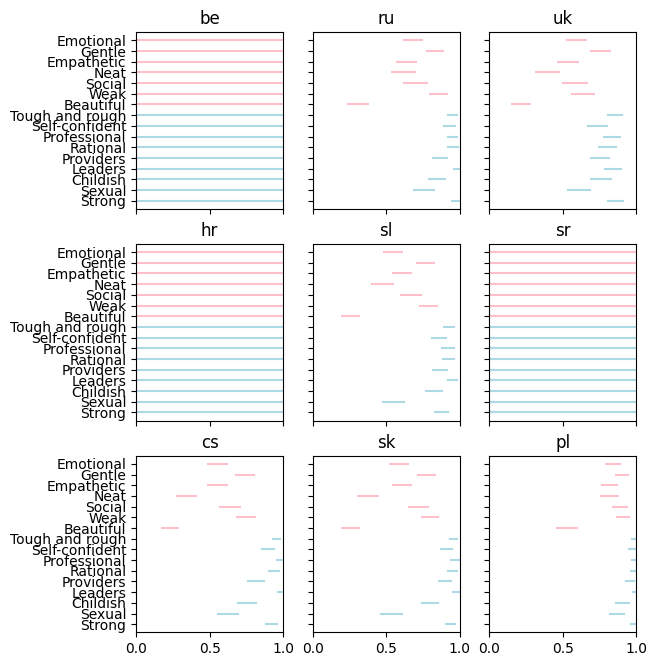

In [12]:
from collections import defaultdict
rates = defaultdict(lambda: list())

fig, axes = plt.subplots(3, 3, sharex=True, sharey=True)
axes = axes.reshape(-1)

for ax, lang in zip(axes, ['be', 'ru', 'uk', 'hr', 'sl', 'sr', 'cs', 'sk', 'pl']):
    for stereotype in range(1, 17):
        labels = [pred for pred, s_id in zip(lazy_preds[lang], stereotypes) if s_id == stereotype]
        male_count = labels.count('male')
        female_count = labels.count('female')
        middle, lower, upper = binary_ci(male_count, male_count + female_count)
        rates[lang].append(middle)
        ax.plot([lower, upper], [stereotype, stereotype], c=('pink' if stereotype < 8 else 'lightblue'))
    ax.set_title(lang)
    ax.set_xlim(0, 1)
    ax.invert_yaxis()
    ax.set_yticks(range(1, 17), stereo_names)
set_size(5, 6)
plt.show()

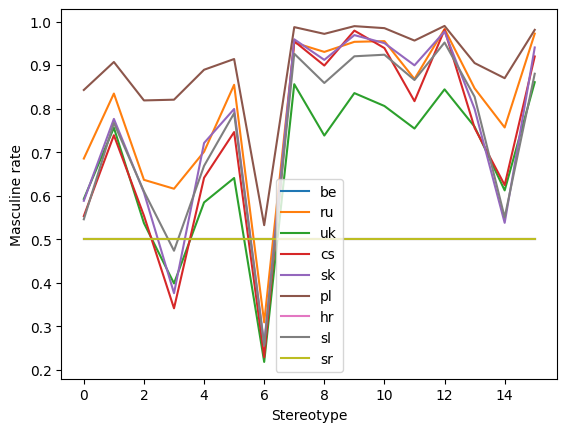

/tmp/ipykernel_2210/467852673.py:25: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  plt.colorbar(plt.imshow(np.corrcoef(np.vstack(rates[l] for l in langs))))
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.8/dist-packages/numpy/lib/function_base.py:2855: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


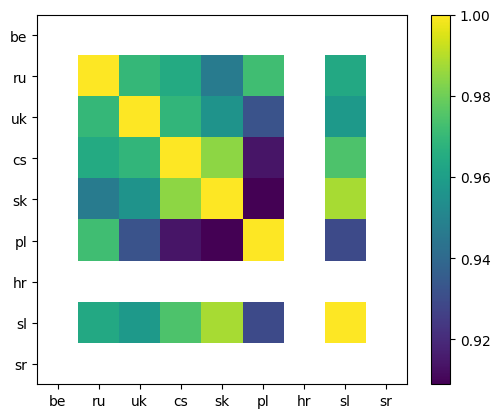

In [13]:
"""
Above:
Male rates as seen for all the languages with different stereotypes. It is clear that the languages
show similar behavior. Either data with similar biases or crosslingual learning.

Below:
Correlations from these plots. How similar different languages behave for these stereotypes.
Seemingly, there are two groups, but I can not tell what the key is (neither geographical, linguistic,
or script make sense). Note that the stereotypes are strong between all of them, so might be just noise.

Some interesting stereotypes:
#7 - Extremely female
#15 - Visible female in the male stereotypes
#2, #5, #6 - Less female overall
"""

langs = ['be', 'ru', 'uk', 'cs', 'sk', 'pl', 'hr', 'sl', 'sr', ]

for l in langs:
    plt.plot(rates[l], label=l)
    plt.legend()
    plt.xlabel('Stereotype')
    plt.ylabel('Masculine rate')
plt.show()
plt.colorbar(plt.imshow(np.corrcoef(np.vstack(rates[l] for l in langs))))
plt.xticks(range(9), langs)
plt.yticks(range(9), langs)
None

/tmp/ipykernel_2210/3912354547.py:16: RuntimeWarning: invalid value encountered in scalar divide
  all_m_ratio = sum(counts[:,0]) / np.sum(counts)
/tmp/ipykernel_2210/3912354547.py:17: RuntimeWarning: invalid value encountered in scalar divide
  f_m_ratio = sum(counts[:7,0]) / np.sum(counts[:7])
/tmp/ipykernel_2210/3912354547.py:18: RuntimeWarning: invalid value encountered in scalar divide
  m_m_ratio = sum(counts[7:,0]) / np.sum(counts[7:])


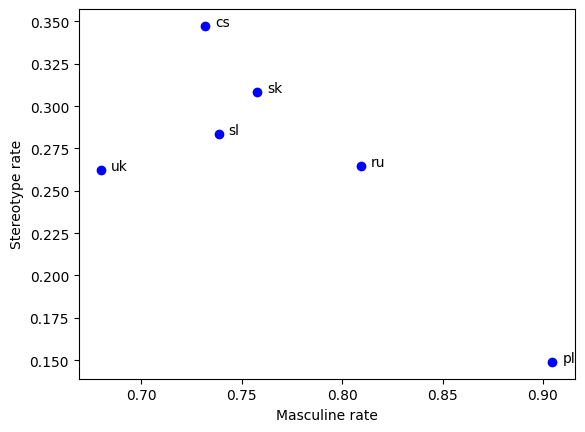

In [14]:
"""
Relation between the masculine rate (how often is masculine gender selected) and the stereotype
rate (how different are the selection rates for male and female stereotypes). It is clear that
there is a trade-off. Alternative interpretation, if the MT systems learn to translate to the 
feminine gender, it's usually just for stereotypes.
"""
for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']:
    counts = np.zeros((16, 2))
    for stereotype in range(1, 17):
        labels = [pred for pred, s_id in zip(lazy_preds[lang], stereotypes) if s_id == stereotype]
        male_count = labels.count('male')
        female_count = labels.count('female')
        counts[stereotype - 1, 0] = male_count
        counts[stereotype - 1, 1] = female_count

    all_m_ratio = sum(counts[:,0]) / np.sum(counts)
    f_m_ratio = sum(counts[:7,0]) / np.sum(counts[:7])
    m_m_ratio = sum(counts[7:,0]) / np.sum(counts[7:])
    plt.scatter([all_m_ratio], [m_m_ratio - f_m_ratio], c='blue')
    plt.text(all_m_ratio + 0.005, m_m_ratio - f_m_ratio, lang)
    plt.xlabel('Masculine rate')
    plt.ylabel('Stereotype rate')
plt.show()
    
    # plt.xlim(0, 1)
    # plt.ylim(0, 1)

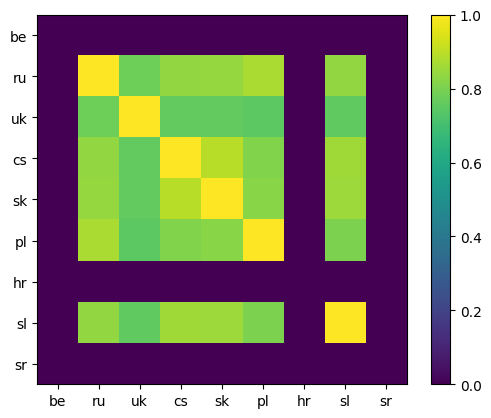

In [15]:
"""
If both languages have predictions, how common it is that they match. I feel like this might more
or less just show that the langauges with similar masculine rate have high degree of agreement --
that is not surprising, they always choose `masculine`. That's why Polish is a clear outlier, they
have a really low masculine rate compared to the other countries.
"""
from itertools import product

langs = ['be', 'ru', 'uk', 'cs', 'sk', 'pl', 'hr', 'sl', 'sr', ]
agree = np.zeros((9, 9))

for i, j in product(langs, langs):
    agree[langs.index(i), langs.index(j)] = sum(
        p == r != None
        for p, r in zip(lazy_preds[i], lazy_preds[j])
    ) / (sum(
        bool(p) and bool(r)
        for p, r in zip(lazy_preds[i], lazy_preds[j])
    ) + 1e-12)

plt.xticks(range(9), langs)
plt.yticks(range(9), langs)
plt.colorbar(plt.imshow(agree))
None

# Disagreements

In [37]:
target_language = 'sk'
google_translate = DeepL(
    data_path='./cache/translations/deepl',
    target_language=target_language,
    enable_api=False
).load()
parser = Parser(language=target_language)

INFO:translators.translator:Loaded translations: 11123


In [42]:
for sentence in sentences:
    if len(parser.dict[google_translate.dataframe.loc[sentence]['to']]['sentences']) == 2:
        print(sentence)

I wasn't happy in Slovakia, even though I didn´t know why. So one day I just packed up and flew to Spain.
I was told by the supervisor that my arguments are not supported well. I felt that they are, but I didn´t say a word.
Let me lift that for you; I wouldn't be happy if something happened to you.


In [16]:
for lang in ['be', 'hr', 'cs', 'pl', 'ru', 'sl', 'sk', 'sr', 'uk']:
    print(lang, sum('male' in hs and 'female' in hs for hs in preds[lang]))

be 0
hr 0
cs 10
pl 4
ru 7
sl 24
sk 10
sr 0
uk 47


In [22]:
google_translate = GoogleTranslate(
    data_path='./cache/translations/google_translate',
    target_language='uk',
    enable_api=False
).load()

for i, hs in enumerate(preds['sl']):
    if 'male' in hs and 'female' in hs:
        # sentence = sentences[i]
        # translation = google_translate.dataframe.loc[sentence]['to']
        print(hs)
        # print(sentence)
        # print(translation)
        # print(unidecode(translation))
        # print()

INFO:translators.translator:Loaded translations: 3779


['female', None, None, None, 'male', None]
['male', 'female', None, None, None, None]
['female', None, 'male', None, None, None]
['female', None, 'male', None, None, None]
['male', 'female', None, None, None, None]
['male', None, 'female', None, None, None]
['male', None, 'female', None, None, None]
['male', 'female', None, None, None, None]
[None, 'male', 'female', None, None, None]
['male', None, 'female', None, None, None]
['male', None, 'female', None, None, None]
['female', 'male', None, None, None, None]
['female', 'male', None, None, None, None]
[None, 'female', 'male', None, None, None]
['male', 'female', None, None, None, None]
['male', None, 'female', None, None, None]
[None, 'male', 'female', None, None, None]
['male', None, 'female', None, None, None]
['female', 'male', None, None, None, None]
['male', None, 'female', None, None, None]
[None, 'male', 'female', None, None, None]
['female', 'male', None, None, None, None]
[None, 'female', 'male', None, None, None]
['male', No

## Tematic bias

The most common words for male words that are misclassifed as female often have _female_-related words in them.

In [125]:
c = Counter()

for sentence, stereotype in zip(sentences, stereotypes):
    if stereotype > 7 and stereotype != 15 and any(heuristic(sentence, translator) == 'female' for translator in translators):
        sentence = sentence.replace(',', '').replace('.', '')
        c.update(sentence.split())

# for sentence, stereotype in zip(sentences, stereotypes):
#     if stereotype < 8 and any(heuristic(sentence, translator) == 'male' for translator in translators):
#         sentence = sentence.replace(',', '').replace('.', '')
#         c.update(sentence.split())

stopwords = open('stopwords.txt').read().splitlines()
for word, count in c.most_common(100):
    if word.lower().strip('.') not in stopwords:
        print(word, count)

partner 11
job 10
care 9
emotions 8
lot 8
kids 7
children 7
confidence 7
family 6
money 5
feel 5
time 5
signed 4
family's 4
happy 4
handle 4
hard 4
saved 4
life 4
